# Arbeitslose analysieren

https://www.opengov-muenchen.de/dataset/monatszahlen-arbeitsmarkt/resource/0b6fe83d-4bf9-4789-9752-a3aefb073020
https://www.opengov-muenchen.de/dataset/monatszahlen-soziale-leistungen

https://www.opengov-muenchen.de/dataset/monatszahlen-bevoelkerung

In [37]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#load data

def get_data_from_opengov_munich(resource_id, limit = 800):
    params = params={
        'resource_id': resource_id, 
        'limit': limit ,
    }
    url = 'https://www.opengov-muenchen.de/api/action/datastore_search'
    r = requests.get(url, params=params).json()
    return pd.DataFrame(r['result']['records'])

    

df_population = get_data_from_opengov_munich('2252dc7c-265b-4f21-aa0e-b602c30cb85f', 80000)
df_hartz_iv =   get_data_from_opengov_munich('bee7fdb6-7333-4c21-a3a7-d2fb96f61dfe')   
df_unemployed = get_data_from_opengov_munich('0b6fe83d-4bf9-4789-9752-a3aefb073020')






# Daten grob analysieren - kann man mit jedem Dataframe machen

In [38]:
df_population.head()

,AUSPRAEGUNG,JAHR,MONAT,VERAEND_VORJAHRESMONAT_PROZENT,VERAEND_VORMONAT_PROZENT,VORJAHRESWERT,WERT,ZAHL,ZWOELF_MONATE_MITTELWERT,_id
0,Berufsschulpflichtige (15- 17 J.),2018,201802,"-0,64","-0,19",32985,32775,Altersgruppen,32929,1
1,Berufsschulpflichtige (15- 17 J.),2018,201801,"-0,61","-0,19",33042,32839,Altersgruppen,32947,2
2,Berufsschulpflichtige (15- 17 J.),2017,201712,"-0,92","-0,16",33207,32901,Altersgruppen,32964,3
3,Berufsschulpflichtige (15- 17 J.),2017,201711,"-1,78","0,03",33549,32953,Altersgruppen,32989,4
4,Berufsschulpflichtige (15- 17 J.),2017,201710,"-1,71","-0,14",33515,32942,Altersgruppen,33039,5


In [44]:
df_population['JAHR'] = df_population.JAHR.astype('int64')
df_population['MONAT'] = df_population.MONAT.astype('int64')
df_population['WERT'] = df_population.WERT.astype('int64')

df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17621 entries, 0 to 17620
Data columns (total 10 columns):
AUSPRAEGUNG                       17621 non-null object
JAHR                              17621 non-null int64
MONAT                             17621 non-null int64
VERAEND_VORJAHRESMONAT_PROZENT    17621 non-null object
VERAEND_VORMONAT_PROZENT          17621 non-null object
VORJAHRESWERT                     16481 non-null object
WERT                              17621 non-null int64
ZAHL                              17621 non-null object
ZWOELF_MONATE_MITTELWERT          17577 non-null object
_id                               17621 non-null int64
dtypes: int64(4), object(6)
memory usage: 1.3+ MB


In [45]:
df_population.describe()

,JAHR,MONAT,WERT,_id
count,17621.000000,17621.000000,1.762100e+04,17621.000000
mean,2009.020203,200908.470461,1.866066e+05,8811.000000
std,5.269119,526.837767,3.235598e+05,5086.888882
min,2000.000000,200001.000000,-1.279200e+04,1.000000
25%,2004.000000,200412.000000,3.277000e+03,4406.000000
50%,2009.000000,200910.000000,1.644300e+04,8811.000000
75%,2014.000000,201402.000000,1.943580e+05,13216.000000
max,2018.000000,201802.000000,1.548319e+06,17621.000000


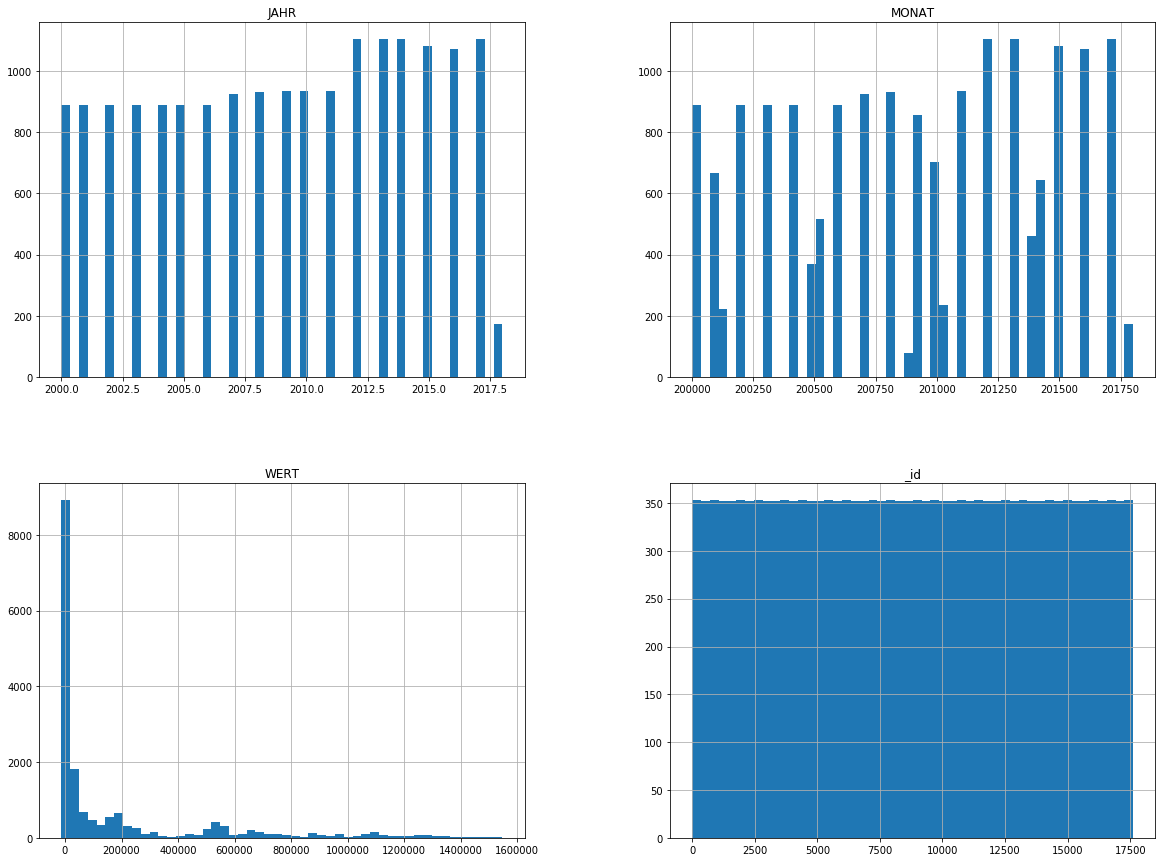

In [46]:
df_population.hist(bins=50, figsize=(20,15))
plt.show()

In [41]:
##################################Monat betrachten
df_unemployed.keys()
print(df_unemployed.AUSPRAEGUNG.unique())

df_unemployed_q2 = df_unemployed.query("MONAT == '201711'") #[df.MONAT =="201802"]
df_unemployed_q2.head()



['Ausländer/innen' 'Deutsche' 'Frauen' 'insgesamt' 'Langzeitarbeitslose'
 'Männer']


,AUSPRAEGUNG,JAHR,MONAT,VERAEND_VORJAHRESMONAT_PROZENT,VERAEND_VORMONAT_PROZENT,VORJAHRESWERT,WERT,ZAHL,ZWOELF_MONATE_MITTELWERT,_id
3,Ausländer/innen,2017,201711,-6.24,-3.36,15755,14772,Arbeitslose,16236,4
149,Deutsche,2017,201711,-6.72,-2.48,19649,18329,Arbeitslose,19701,150
296,Frauen,2017,201711,-3.21,-2.78,16564,16032,Arbeitslose,16925,296
441,insgesamt,2017,201711,-6.5,-2.86,35404,33101,Arbeitslose,35936,442
587,Langzeitarbeitslose,2017,201711,-10.67,-2.38,10005,8937,Arbeitslose,9663,588


In [88]:
df_hiv_q2 =  df_hartz_iv.query("MONAT == '201711'")
df_hiv_q2.head()

,AUSPRAEGUNG,JAHR,MONAT,VERAEND_VORJAHRESMONAT_PROZENT,VERAEND_VORMONAT_PROZENT,VORJAHRESWERT,WERT,ZAHL,ZWOELF_MONATE_MITTELWERT,_id
0,Ausländer/innen,2017,201711,"4,09","0,35",8589,8940,Empfänger nach SGB XII,8777,1
119,Deutsche,2017,201711,"2,13","0,08",14048,14347,Empfänger nach SGB XII,14183,120
240,Empfänger/innen insges.,2017,201711,"2,87","0,18",22637,23287,Empfänger nach SGB XII,22959,239
359,Frauen,2017,201711,"2,84","0,06",11853,12190,Empfänger nach SGB XII,12031,358
478,Männer,2017,201711,"2,9","0,33",10784,11097,Empfänger nach SGB XII,10929,477


In [89]:
df_population_q2 = df_population.query("JAHR == '2017'")
df_population_q2

,AUSPRAEGUNG,JAHR,MONAT,VERAEND_VORJAHRESMONAT_PROZENT,VERAEND_VORMONAT_PROZENT,VORJAHRESWERT,WERT,ZAHL,ZWOELF_MONATE_MITTELWERT,_id
2,Berufsschulpflichtige (15- 17 J.),2017,201712,"-0,92","-0,16",33207,32901,Altersgruppen,32964,3
3,Berufsschulpflichtige (15- 17 J.),2017,201711,"-1,78","0,03",33549,32953,Altersgruppen,32989,4
4,Berufsschulpflichtige (15- 17 J.),2017,201710,"-1,71","-0,14",33515,32942,Altersgruppen,33039,5
5,Berufsschulpflichtige (15- 17 J.),2017,201709,"-2,39","0,22",33796,32989,Altersgruppen,33087,6
6,Berufsschulpflichtige (15- 17 J.),2017,201708,"-2,53","-0,08",33772,32917,Altersgruppen,33154,7
7,Berufsschulpflichtige (15- 17 J.),2017,201707,"-2,39","-0,08",33750,32943,Altersgruppen,33225,8
8,Berufsschulpflichtige (15- 17 J.),2017,201706,"-2,19","-0,03",33705,32968,Altersgruppen,33292,9
9,Berufsschulpflichtige (15- 17 J.),2017,201705,"-2,09","-0,07",33682,32977,Altersgruppen,33354,10
10,Berufsschulpflichtige (15- 17 J.),2017,201704,"-2,16","0,17",33729,33001,Altersgruppen,33413,11
11,Berufsschulpflichtige (15- 17 J.),2017,201703,"-3,15","-0,12",34019,32946,Altersgruppen,33473,12


In [90]:
print(df_population_q2.ZAHL.unique())

['Altersgruppen' 'Eheschlieungen' 'EU-Nationalitten' 'Familienstand'
 'Geborene' 'Geschlecht und Staatsangehrigkeit' 'Gestorbene' 'Umzge'
 'Haushalte nach Kinderzahl' 'Haushalte nach Nationengruppe'
 'Haushalte nach Personenzahl' 'Kontinente' 'Migrationshintergrund'
 'Natrliches Saldo' 'Nicht-EU-Nationalitten' 'Religionszugehrigkeit'
 'Wanderungssaldo' 'Wegzge' 'Zuzge']


In [94]:
totals =  df_population_q2.query("ZAHL == 'Haushalte nach Nationengruppe'")
totals

,AUSPRAEGUNG,JAHR,MONAT,VERAEND_VORJAHRESMONAT_PROZENT,VERAEND_VORMONAT_PROZENT,VORJAHRESWERT,WERT,ZAHL,ZWOELF_MONATE_MITTELWERT,_id
10064,auslndisch,2017,201712,"-6,36","0,01",181643,170084,Haushalte nach Nationengruppe,179169,9959
10065,auslndisch,2017,201711,"-6,6","-1,54",182082,170066,Haushalte nach Nationengruppe,180132,9960
10066,auslndisch,2017,201710,"-5,05","0,46",181912,172726,Haushalte nach Nationengruppe,181133,9961
10067,auslndisch,2017,201709,"-4,17","-4,22",179419,171937,Haushalte nach Nationengruppe,181899,9962
10068,auslndisch,2017,201708,"0,52","-2,11",178597,179520,Haushalte nach Nationengruppe,182522,9963
10069,auslndisch,2017,201707,"2,88","-0,63",178259,183388,Haushalte nach Nationengruppe,182445,9964
10070,auslndisch,2017,201706,"4,71","-0,06",176238,184547,Haushalte nach Nationengruppe,182018,9965
10071,auslndisch,2017,201705,5,"0,48",175872,184657,Haushalte nach Nationengruppe,181325,9966
10072,auslndisch,2017,201704,"4,88","0,14",175235,183780,Haushalte nach Nationengruppe,180593,9967
10073,auslndisch,2017,201703,"5,03","0,16",174728,183525,Haushalte nach Nationengruppe,179881,9968
